# Supervised learning using scikit-learn

The goal of this tutorial is to introduce you to the scikit libraries for classification. We will also cover feature selection, and evaluation.

In [ ]:
import numpy as np
import scipy.sparse as sp_sparse

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics

import seaborn as sns

%matplotlib inline

## Feature Selection

Feature selection is about finding the best features for your classifier. This may be important if you do not have enough training data. The idea is to find metrics that either characterize the features by themselves, or with respect to the class we want to predict, or with respect to other features.

http://scikit-learn.org/stable/modules/feature_selection.html

#### Variance Threshold

The **VarianceThreshold** selection drops features whose variance is below some threshold. If we have binary features we can estimate the treshold exactly so as to guarantee a specific ratio of 0's and 1's

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(np.array(X))
print('\n')
sel = VarianceThreshold(threshold=(0.8*(1 - .8)))  # p*(1-p) = 0.16 , p = 0.5 = MaxVariance (for binary)
sel.fit_transform(X)                               # Here we set Threshold at p = 0.8

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]




array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

What happended in this example? Which feature was removed and why?

In [ ]:
import sklearn.datasets as sk_data
iris = sk_data.load_iris()
X = iris.data
print(X[1:10,:])
print('\nVariance of the Features:')
print(X.var(axis = 0))
sel = VarianceThreshold(threshold=0.2)
print('\nData after applying Variance Threshold:')
sel.fit_transform(X)[1:10]

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Variance of the Features:
[0.68112222 0.18871289 3.09550267 0.57713289]

Data after applying Variance Threshold:


array([[4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

Is it always a good idea to remove low variance features? Can we think of a counterexample?

#### Univariate Feature Selection ####

A more sophisticated feature selection technique uses a test to determine if a feature and the class label are independent. An example of such a test is the [chi-square test](https://en.wikipedia.org/wiki/Chi-squared_test) (there are more as we have seen when studying statistics)

In this case we keep the features with high chi-square score and low p-value.

The features with the lowest scores and highest p-values are rejected.

The chi-square test is usually applied on categorical data.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = sk_data.load_iris()
X, y = iris.data, iris.target
print(X.shape)
print('\nFeatures:')
print(X[1:10,:])
print('\nLabels:')
print(y)
sel = SelectKBest(chi2, k=2)     # Select the top k=2 features with the highest chi-square scores
X_new = sel.fit_transform(X, y)
print('\nSelected Features:')
print(X_new[1:10])

(150, 4)

Features:
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Selected Features:
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


The chi-square values and the p-values between features and target variable (X columns and y)

In [ ]:
print('Chi2 values')
print(sel.scores_)
c,p = sk.feature_selection.chi2(X, y)
print('\nChi2 values')
print(c) #The chi-square value between X columns and y
print('\np-values')
print(p) #The p-value for the test

Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]

Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]

p-values
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


## Supervised Learning

Python has several classes and objects for implementing different supervised learning techniques such as Regression and Classification.

Regardless of the model being implemented, the following methods are implemented:

The method **fit()** takes the training data and labels/values, and trains the model

The method **predict()** takes as input the test data and applies the model.

## Preparing the data

To perform classification we first need to prepare the data into train and test datasets.

In [ ]:
from sklearn.datasets import load_iris
import sklearn.utils as utils

iris = load_iris()
print("sample of data")
print(iris.data[:5,:])
print("\nthe class labels vector")
print(iris.target)
print("\nthe names of the classes:",iris.target_names)
print(iris.feature_names)

sample of data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

the class labels vector
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

the names of the classes: ['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Randomly shuffle the data. This is useful to know that the data is in random order

In [ ]:
X, y = utils.shuffle(iris.data, iris.target, random_state=1) #shuffle the data
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2
 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1
 2 0]


Select a subset for training and a subset for testing

In [ ]:
train_set_size = 100
X_train = X[:train_set_size]  # selects first 100 rows (samples) for train set
y_train = y[:train_set_size]
X_test = X[train_set_size:]   # selects from row 100 until the last one for test set
y_test = y[train_set_size:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


We can also use the <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split">train_test_split function</a> of python for splitting the data into train and test sets. In this case you do not need the random shuffling (but it does not hurt).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Classification models

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Python has classes and objects that implement the different classification techniques that we described in class.

### Decision Trees
http://scikit-learn.org/stable/modules/tree.html

Train and apply a decision tree classifier. The default score computed in the classifier object is the accuracy. Decision trees can also give us probabilities

In [ ]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier() # max_depth=None, No fixed randomness for handling Tied Splits (random_state = 0)
dtree = dtree.fit(X_train, y_train)

print("classifier accuracy:",dtree.score(X_test,y_test))

y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)
print("\nclassifier predictions:",y_pred[:10])
print("ground truth labels   :",y_test[:10])
print('\n')
print(y_prob[:10])

classifier accuracy: 0.9

classifier predictions: [2 2 2 0 0 0 2 2 2 2]
ground truth labels   : [1 2 2 0 0 0 2 2 2 2]


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Why does y_prob have only 0 and 1 entries?

Compute some more metrics

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

accuracy: 0.9

Confusion matrix
[[20  0  0]
 [ 0 15  4]
 [ 0  2 19]]

Precision Score per class
[1.         0.88235294 0.82608696]

Average Precision Score
0.9018755328218244

Recall Score per class
[1.         0.78947368 0.9047619 ]

Average Recall Score
0.9

F1-score Score per class
[1.         0.83333333 0.86363636]

Average F1 Score
0.8994949494949495


Visualize the decision tree.

For this you will need to install the package python-graphviz

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


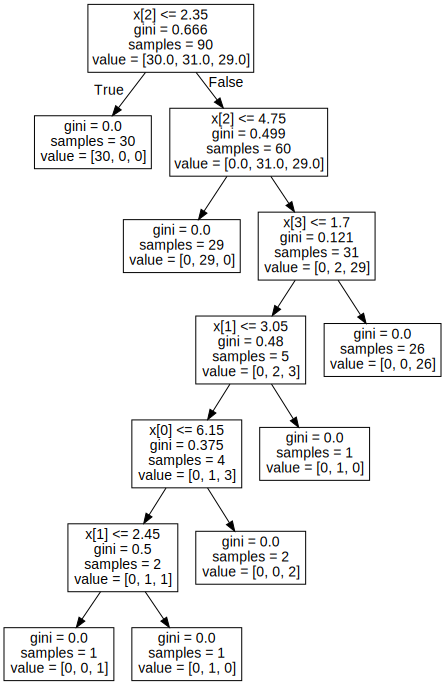

In [ ]:
#conda install python-graphviz
import graphviz
print(iris.feature_names)
dot_data = tree.export_graphviz(dtree,out_file=None)
graph = graphviz.Source(dot_data)
graph

0.9166666666666666


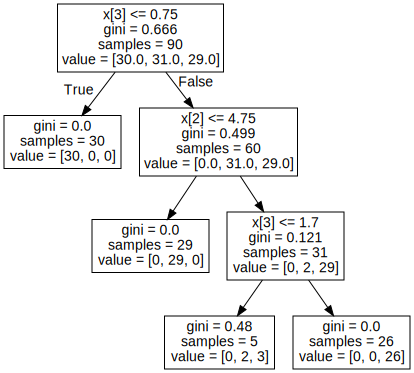

In [ ]:
dtree2 = tree.DecisionTreeClassifier(max_depth=3)  # Based on the above diagrame most of the classification is done on Depth = 3
dtree2 = dtree2.fit(X_train, y_train)
print(dtree2.score(X_test,y_test))
dot_data2 = tree.export_graphviz(dtree2,out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2


### k-NN Classification ###

https://scikit-learn.org/stable/modules/neighbors.html#classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("classifier score:", knn.score(X_test,y_test))

y_pred = knn.predict(X_test)

print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9333333333333333

accuracy: 0.9333333333333333

Confusion matrix
[[20  0  0]
 [ 0 16  3]
 [ 0  1 20]]

Precision Score per class
[1.         0.94117647 0.86956522]

Average Precision Score
0.9357203751065644

Recall Score per class
[1.         0.84210526 0.95238095]

Average Recall Score
0.9333333333333333

F1-score Score per class
[1.         0.88888889 0.90909091]

Average F1 Score
0.9329966329966329


Example image of how kNN draws Decision Boundaries. In our case that there are 4 features such a plot connot be made since it will have to be in 4D.

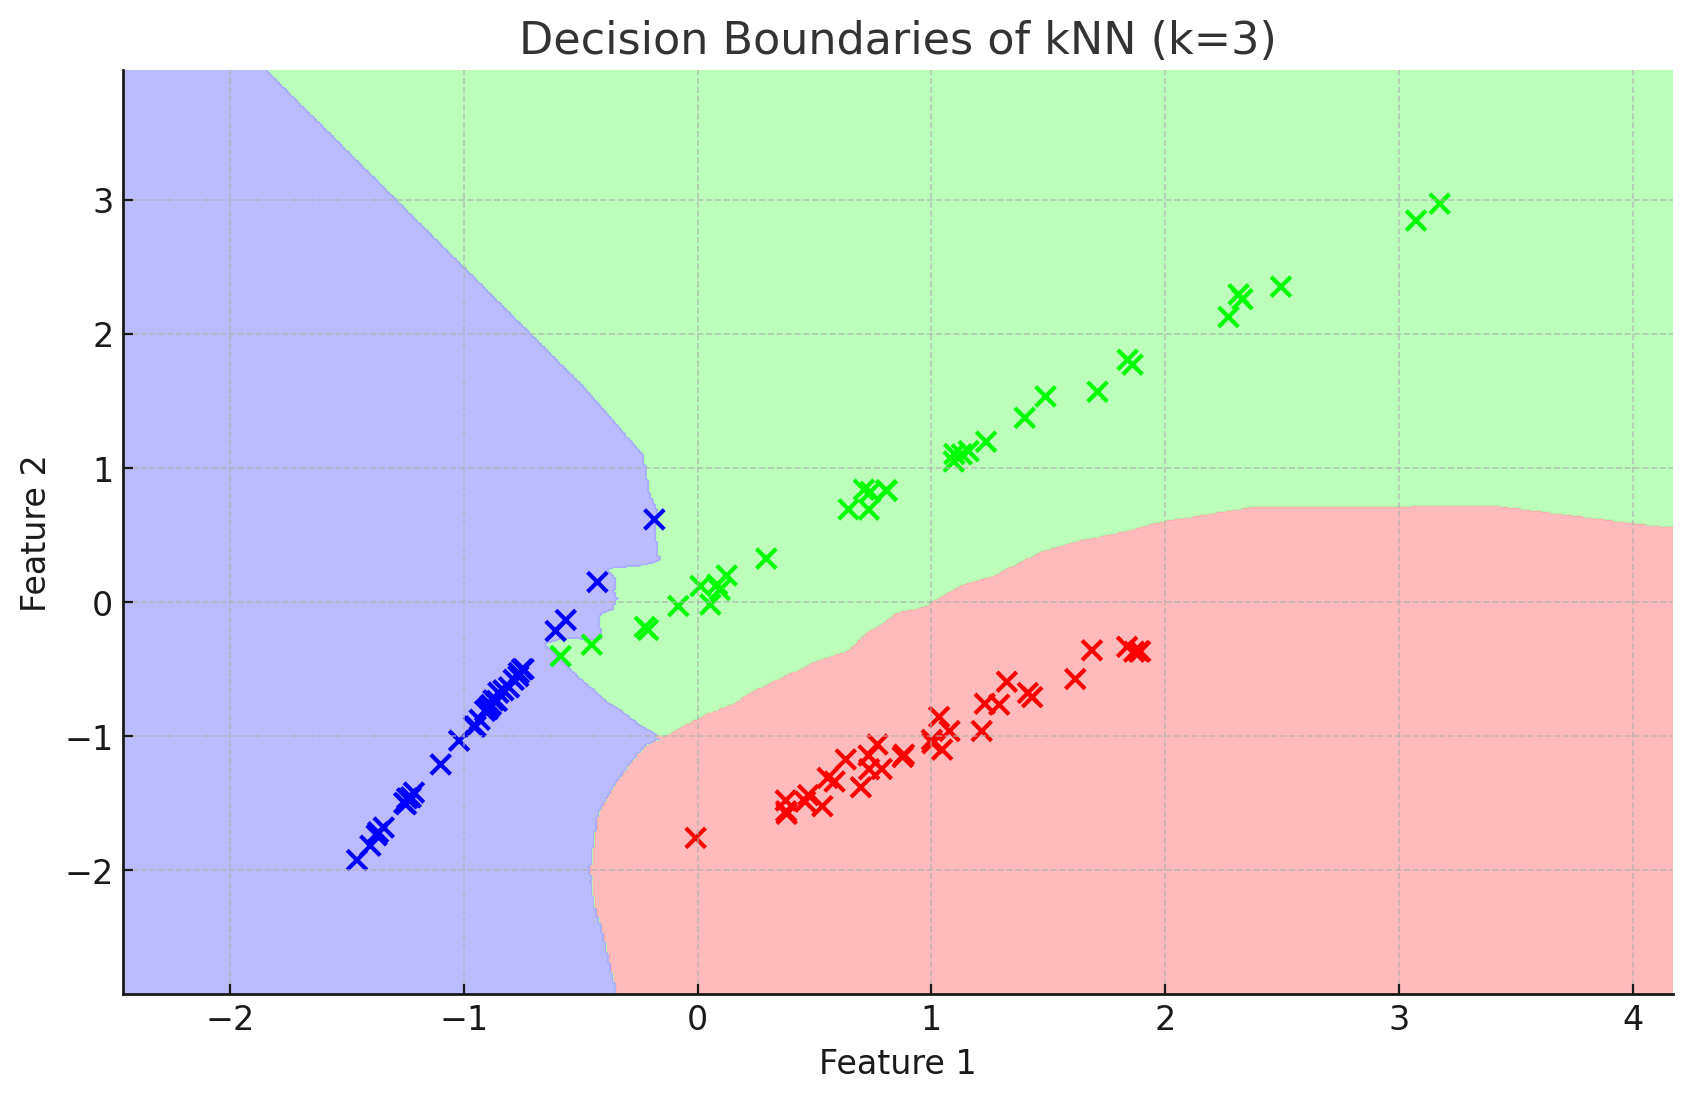

### SVM Classification

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
from sklearn import svm

#svm_clf = svm.LinearSVC()
#svm_clf = svm.SVC(kernel = 'poly')   # kernel determines how the data is transformed to make it linearly separable
svm_clf = svm.SVC()                   # default kernel: Radial basis function (rbf)
svm_clf.fit(X_train,y_train)
print("classifier score:",svm_clf.score(X_test,y_test))
y_pred = svm_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.95

accuracy: 0.95

Confusion matrix
[[20  0  0]
 [ 0 18  1]
 [ 0  2 19]]

Precision Score per class
[1.   0.9  0.95]

Average Precision Score
0.9508333333333333

Recall Score per class
[1.         0.94736842 0.9047619 ]

Average Recall Score
0.95

F1-score Score per class
[1.         0.92307692 0.92682927]

Average F1 Score
0.9500312695434646


kNN vs SVM Descision Boundries

kNN: Decision boundaries are determined by local data density based on majority voting among the k nearest neighbors

SVM: Decision boundaries are determined by maximizing the margin using support vectors. Particularly effective in high-dimensional or sparse datasets.

### Logistic Regression ###

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [ ]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_train, y_train)
print("classifier score:",lr_clf.score(X_test,y_test))
y_pred = lr_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))


classifier score: 0.95

accuracy: 0.95

Confusion matrix
[[20  0  0]
 [ 0 17  2]
 [ 0  1 20]]

Precision Score per class
[1.         0.94444444 0.90909091]

Average Precision Score
0.9505892255892257

Recall Score per class
[1.         0.89473684 0.95238095]

Average Recall Score
0.95

F1-score Score per class
[1.         0.91891892 0.93023256]

Average F1 Score
0.9499057196731615


For Logistic Regression we can also obtain the probabilities for the different classes

In [ ]:
probs = lr_clf.predict_proba(X_test)
print("Class Probabilities (first 10):")
print (probs[:10])
print(y_test[:10])
print(probs.argmax(axis = 1)[:10])
print(probs.max(axis = 1)[:10])

Class Probabilities (first 10):
[[3.58063148e-03 4.78837546e-01 5.17581823e-01]
 [1.14629853e-03 4.05835954e-01 5.93017748e-01]
 [3.92637998e-05 6.43273518e-02 9.35633384e-01]
 [9.58095500e-01 4.19027830e-02 1.71652302e-06]
 [9.43362956e-01 5.66340870e-02 2.95722475e-06]
 [9.82882523e-01 1.71170399e-02 4.36780298e-07]
 [5.55194769e-05 7.15154512e-02 9.28429029e-01]
 [1.95254914e-04 1.77448058e-01 8.22356688e-01]
 [1.39405111e-04 1.43508188e-01 8.56352407e-01]
 [1.28136540e-05 1.91639587e-02 9.80823228e-01]]
[1 2 2 0 0 0 2 2 2 2]
[2 2 2 0 0 0 2 2 2 2]
[0.51758182 0.59301775 0.93563338 0.9580955  0.94336296 0.98288252
 0.92842903 0.82235669 0.85635241 0.98082323]


And the coeffients of the logistic regression model

In [ ]:
print(lr_clf.coef_)

[[-0.41634639  0.72750241 -2.1925908  -0.94546909]
 [ 0.08210367 -0.3869188  -0.02260978 -0.69668014]
 [ 0.33424272 -0.34058362  2.21520059  1.64214923]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


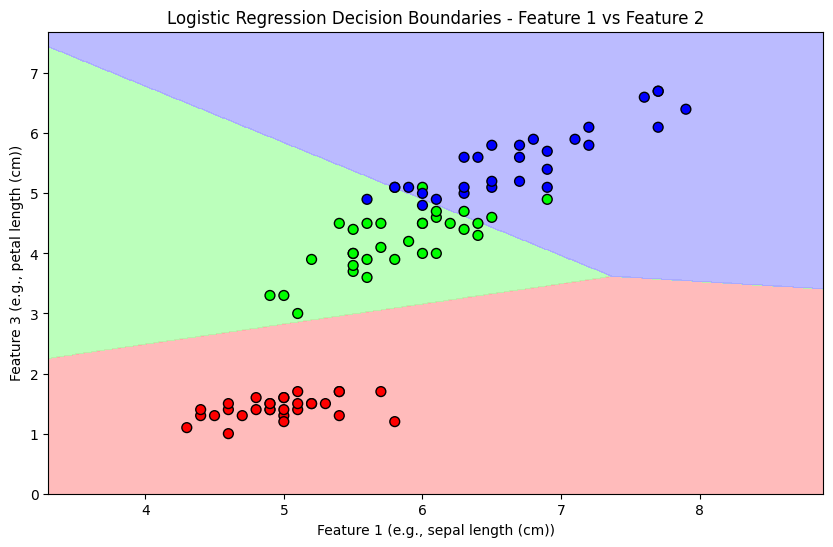

In [ ]:
from matplotlib.colors import ListedColormap

# Select two features for visualization
feature_1_idx = 0  # e.g., sepal length
feature_2_idx = 2  # e.g., petal length

X_train_2d = X_train[:, [feature_1_idx, feature_2_idx]]
X_test_2d = X_test[:, [feature_1_idx, feature_2_idx]]

# Train Logistic Regression on the two selected features
lr_clf_2d = linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr')
lr_clf_2d.fit(X_train_2d, y_train)

# Generate a grid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict for each grid point
Z = lr_clf_2d.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("Logistic Regression Decision Boundaries - Feature 1 vs Feature 2")
plt.xlabel(f"Feature {feature_1_idx + 1} (e.g., {iris.feature_names[feature_1_idx]})")
plt.ylabel(f"Feature {feature_2_idx + 1} (e.g., {iris.feature_names[feature_2_idx]})")
plt.show()

### Neural Networks: Mutli-Layer Perceptron

https://scikit-learn.org/stable/modules/neural_networks_supervised.html
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs')
print("MLP Default Architecture")
print(mlp_clf.hidden_layer_sizes)
mlp_clf.fit(X_train, y_train)
print("\nclassifier score:",mlp_clf.score(X_test,y_test))
y_pred = mlp_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

MLP Default Architecture
(100,)

classifier score: 0.95

accuracy: 0.95

Confusion matrix
[[20  0  0]
 [ 0 17  2]
 [ 0  1 20]]

Precision Score per class
[1.         0.94444444 0.90909091]

Average Precision Score
0.9505892255892257

Recall Score per class
[1.         0.89473684 0.95238095]

Average Recall Score
0.95

F1-score Score per class
[1.         0.91891892 0.93023256]

Average F1 Score
0.9499057196731615


Lets see the Descision Boundaries that the MLP makes

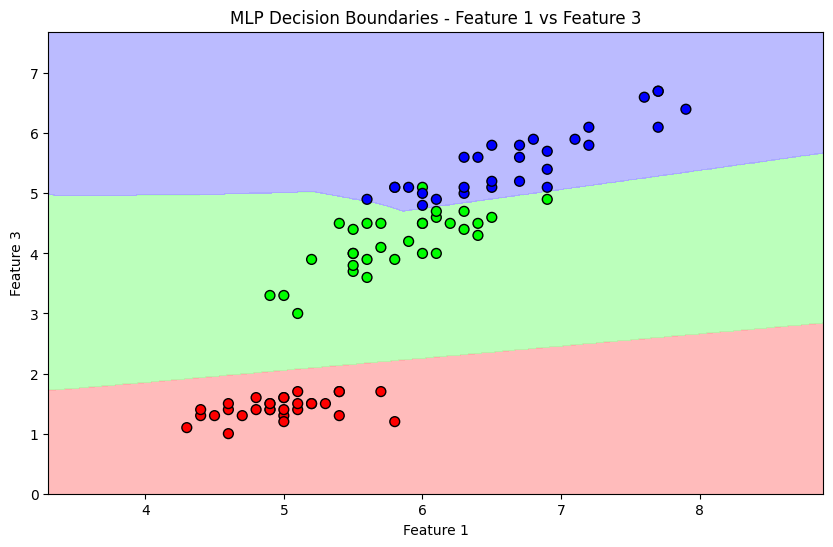

In [ ]:
# Select two features for visualization
feature_1_idx = 0  # First feature
feature_2_idx = 2  # Third feature

X_train_2d = X_train[:, [feature_1_idx, feature_2_idx]]
X_test_2d = X_test[:, [feature_1_idx, feature_2_idx]]

# Train MLP on selected features
mlp_clf_2d = MLPClassifier(solver='lbfgs')
mlp_clf_2d.fit(X_train_2d, y_train)

# Generate grid for decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = mlp_clf_2d.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("MLP Decision Boundaries - Feature 1 vs Feature 3")
plt.xlabel(f"Feature {feature_1_idx + 1}")
plt.ylabel(f"Feature {feature_2_idx + 1}")
plt.show()


Computing Scores

In [ ]:
p,r,f,s = metrics.precision_recall_fscore_support(y_test,y_pred)  # y_pred is from the MLP
print(p)
print(r)
print(f)
print(s)

[1.         0.94444444 0.90909091]
[1.         0.89473684 0.95238095]
[1.         0.91891892 0.93023256]
[20 19 21]


In [ ]:
report = metrics.classification_report(y_test,y_pred)  # Support tell us how many samples of each class are in the y_test
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.89      0.92        19
           2       0.91      0.95      0.93        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



More on Evaluation: http://scikit-learn.org/stable/model_selection.html#model-selection

## Linear Regression

Linear Regression is implemented in the library sklearn.linear_model.

LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [ ]:
from sklearn.linear_model import LinearRegression
X_reg = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# Target Variables
y_reg = np.dot(X_reg, np.array([1, 2])) + 3    # y = 1 * x_0 + 2 * x_1 + 3

reg = LinearRegression().fit(X_reg, y_reg)

print(X_reg)
print(y_reg)

[[1 1]
 [1 2]
 [2 2]
 [2 3]]
[ 6  8  9 11]


In [ ]:
#Obtain the function coefficients
print(reg.coef_)
#and the intercept
print(reg.intercept_)

[1. 2.]
3.0000000000000018


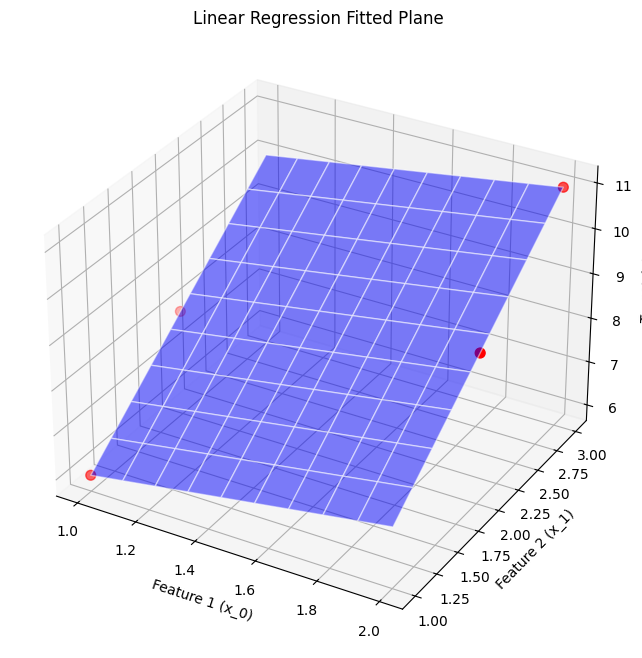

In [ ]:
# Data: Input features (2D) and target values
X_reg = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# True relationship: y = 1*x_0 + 2*x_1 + 3
y_reg = np.dot(X_reg, np.array([1, 2])) + 3

# Train the Linear Regression model
reg = LinearRegression().fit(X_reg, y_reg)

# Visualize Predictions vs Actual Data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the input data
ax.scatter(X_reg[:, 0], X_reg[:, 1], y_reg, color='red', label='Actual Data', s=50)

# Create a grid for visualizing the regression plane
x0_range = np.linspace(min(X_reg[:, 0]), max(X_reg[:, 0]), 10)
x1_range = np.linspace(min(X_reg[:, 1]), max(X_reg[:, 1]), 10)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
y_pred_plane = reg.intercept_ + reg.coef_[0] * x0_grid + reg.coef_[1] * x1_grid

# Plot the regression plane
ax.plot_surface(x0_grid, x1_grid, y_pred_plane, alpha=0.5, color='blue', edgecolor='w')

# Labels and Titles
ax.set_title("Linear Regression Fitted Plane")
ax.set_xlabel("Feature 1 (x_0)")
ax.set_ylabel("Feature 2 (x_1)")
ax.set_zlabel("Target (y)")

plt.show()

The [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) computes the "explained variance"

$R^2 = 1-\frac{\sum_i (y_i -\hat y_i)^2}{\sum_i (y_i -\bar y)^2}$

where $\hat y_i$ is the prediction for point $x_i$ and $\bar y$ is the mean value of the target variable

In [ ]:
print(reg.score(X_reg, y_reg))

1.0


In [ ]:
#Predict for a new point
reg.predict(np.array([[3, 5]]))

array([16.])

A more complex example with the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [ ]:
diabetes_X, diabetes_y = sk_data.load_diabetes(return_X_y=True)   # X = 10 features (Age, BMI, Blood pressure, etc...)
                                                                  # y = Quantitative measure for disease progression (Continuous Value)
# Shuffle the data
diabetes_X, diabetes_y = utils.shuffle(diabetes_X, diabetes_y, random_state=1)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction           # Obviously here we dont have a perfect fit for a linear model like before
# Computed over the *test* data
print('\nCoefficient of determination: %.2f'
      % metrics.r2_score(diabetes_y_test, diabetes_y_pred))
print('\nPredictions:')
print(diabetes_y_pred)
print('\nTrue values:')
print(diabetes_y_test)

Coefficients: 
 [  -8.80064784 -238.68584171  515.45675075  329.26068533 -878.18560171
  530.03616927  126.04120869  213.28386451  734.45899793   67.32731226]

Mean squared error: 2305.01

Coefficient of determination: 0.68

Predictions:
[149.7546802  199.76667761 248.11135815 182.95023775  98.34758327
  96.66442169 248.60103198  64.8494556  234.5250113  209.30960598
 179.26527876  85.95464444  70.53999409 197.9358827  100.34679414
 116.8171366  134.97124147  64.08460686 178.33480132 155.32208789]

True values:
[168. 221. 310. 283.  81.  94. 277.  72. 270. 268. 174.  96.  83. 222.
  69. 153. 202.  43. 124. 276.]


The [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [ ]:
cancer_data = sk_data.load_breast_cancer()
X_cancer,y_cancer  = utils.shuffle(cancer_data.data, cancer_data.target, random_state=1)
X_cancer_train = X_cancer[:500]
y_cancer_train = y_cancer[:500]
X_cancer_test = X_cancer[500:]
y_cancer_test = y_cancer[500:]
lr_clf.fit(X_cancer_train, y_cancer_train)
print("classifier score:",lr_clf.score(X_cancer_test,y_cancer_test))

classifier score: 0.9565217391304348


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Precision vs Recall**

High Precision = Fewer false positives

High Recall = Fewer false negatives

In this binary example we get different Precision and Recall scores for different threashold values.

For a given **threshold**: $t$, the model predicts the positive class $(\hat{y} = 1)$ for all samples where:

$$
P(\text{class}=1) \geq t
$$

and predicts the negative class $( \hat{y} = 0)$ otherwise. The threshold is varied over the range of predicted probabilities, and for each threshold, the **Precision** and **Recall** are computed as:

$$
\text{Precision}(t) = \frac{\text{True Positives}(t)}{\text{True Positives}(t) + \text{False Positives}(t)}
$$

$$
\text{Recall}(t) = \frac{\text{True Positives}(t)}{\text{True Positives}(t) + \text{False Negatives}(t)}
$$

The resulting Precision-Recall Curve is plotted by connecting the Precision and Recall values computed for all thresholds.



Class Probabilities (first 10):
[[5.62640590e-01 4.37359410e-01]
 [7.80253600e-03 9.92197464e-01]
 [9.99975727e-01 2.42733976e-05]
 [9.99807843e-01 1.92156942e-04]
 [2.64824860e-02 9.73517514e-01]
 [9.99971143e-01 2.88574620e-05]
 [4.97571206e-03 9.95024288e-01]
 [1.87068312e-03 9.98129317e-01]
 [2.00824189e-03 9.97991758e-01]
 [6.51356627e-02 9.34864337e-01]]


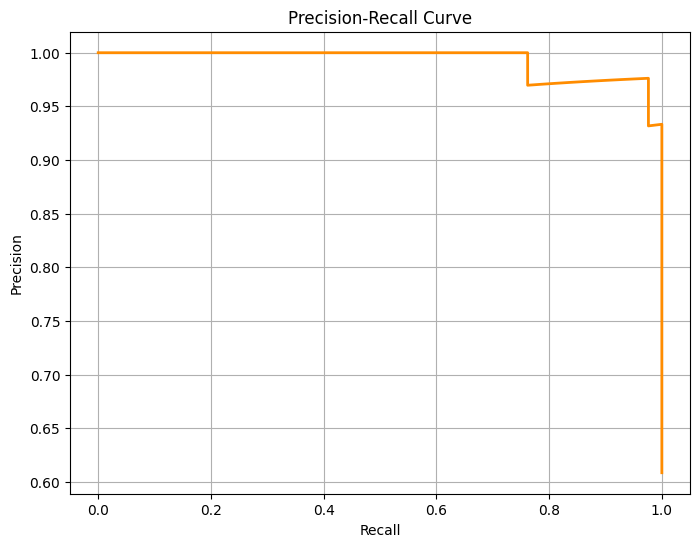

In [ ]:
y_cancer_pred = lr_clf.predict(X_cancer_test)
cancer_probs = lr_clf.predict_proba(X_cancer_test)
print("Class Probabilities (first 10):")
print (cancer_probs[:10])
y_cancer_scores = cancer_probs[:,1]

precision, recall, thresholds = metrics.precision_recall_curve(y_cancer_test, y_cancer_scores)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

0.9894179894179893


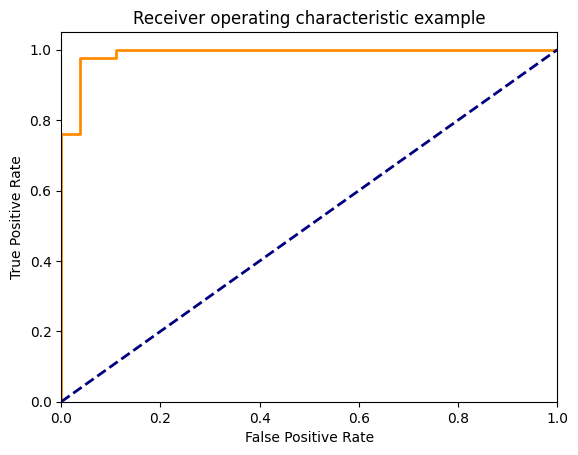

In [ ]:
fpr, tpr, ths = metrics.roc_curve(y_cancer_test,y_cancer_scores)
plt.plot(fpr,tpr,color='darkorange',lw=2)
print(metrics.roc_auc_score(y_cancer_test,y_cancer_scores))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
#plt.legend(loc="lower right")
plt.show()

[[0.80725523 0.19274477]
 [0.98277101 0.01722899]
 [0.26698881 0.73301119]
 [0.54166518 0.45833482]
 [0.99698808 0.00301192]
 [0.03876398 0.96123602]
 [0.9389045  0.0610955 ]
 [0.99842866 0.00157134]
 [0.99601215 0.00398785]
 [0.08712684 0.91287316]]


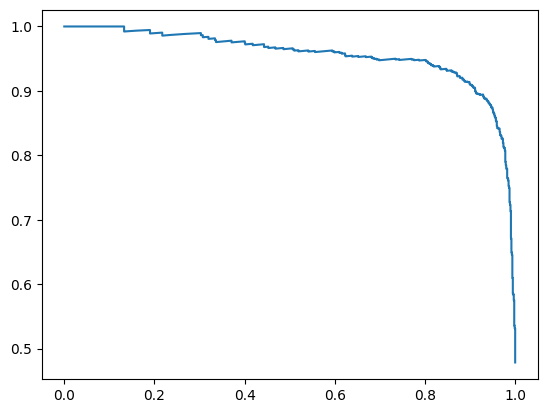

In [ ]:
(Xtoy,y_toy)=sk_data.make_classification(n_samples=10000)  # Synthetic dataset for binary classification
Xttrain = Xtoy[:8000,:]                                    # X = 20 features
Xttest = Xtoy[8000:,:]
yttrain = y_toy[:8000]
yttest = y_toy[8000:]

lr_clf.fit(Xttrain, yttrain)
#print(lr_clf.score(Xttest,yttest))
#y_tpred = lr_clf.predict(X_test)
tprobs = lr_clf.predict_proba(Xttest)
print (tprobs[:10])

y_tscores = tprobs[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(yttest,y_tscores)
plt.plot(recall,precision)

### k-fold cross validation ###

In k-fold cross validation the data is split into k equal parts, the k-1 are used for training and the last one for testing. k models are trained, each time leaving a different part for testing

https://scikit-learn.org/stable/modules/cross_validation.html

There are two methods for implementing k-fold cross-validation, under the library model selection: <a href = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html>cross_val_score</a>, and <a href = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html>cross validate</a>. The latter allows multiple metrics to be considered together.

In [ ]:
import sklearn.model_selection as model_selection

scores = model_selection.cross_val_score(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring='f1_weighted',
                                          cv=5)
print (scores)
print (scores.mean())

[1.         0.93333333 0.96658312 0.96658312 0.86111111]
0.9455221386800334


In [ ]:
scores = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=3)
print (scores)
print (scores['test_precision_weighted'].mean(),scores['test_recall_weighted'].mean())

{'fit_time': array([0.00183892, 0.00106382, 0.00099516]), 'score_time': array([0.00561571, 0.00419927, 0.00663209]), 'test_precision_weighted': array([0.96      , 0.98111111, 0.88308772]), 'test_recall_weighted': array([0.96, 0.98, 0.88])}
0.9413996101364522 0.94


### Creating a pipeline

If the same steps are often repeated, you can create a pipeline to perform them all at once:

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

### Text classification Example ###

We will use the 20 newsgroups to do a text classification example

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.space','rec.sport.baseball']
#categories = ['alt.atheism', 'rec.sport.baseball']
news_train = sk_data.fetch_20newsgroups(subset='train',
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (len(news_train.target))
X_news_train_data = news_train.data
y_news_train = news_train.target
news_test = sk_data.fetch_20newsgroups(subset='test',
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (len(news_test.target))
X_news_test_data = news_test.data
y_news_test = news_test.target

1190
791


In [ ]:
X_news_train_data[0]

"Sorry for asking a question that's not entirely based on the\ntechnical aspects of space, but I couldn't find the\nanswer on the FAQs !\n\nI'm currently in the UK, which makes seeing a Space Shuttle\nlaunch a little difficult.....\n\nHowever, I have been selected to be an exchange student\nat Louisiana State Uni. from August, and I am absolutely\ndetermined to get to see a Space Shuttle launch sometime\nduring the year at which I will be in America.\n\nI hear there's a bit of a long mailing list, so if someone\ncan tell me how to get tickets and where to get them from, then\nplease E-mail me !\n\nThanks very much for your patience....\n\n(And if anyone else wants to know, tell me and I'll summarize\nfor you - just to save all those poor people who have to\npay for their links !)"

In [ ]:
y_news_train[0]

1

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model

import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
X_news_train = vectorizer.fit_transform(X_news_train_data)

lr_clf = linear_model.LogisticRegression(solver='lbfgs')
lr_clf.fit(X_news_train, y_news_train)

LogisticRegression()

In [ ]:
X_news_test = vectorizer.transform(X_news_test_data)
print("classifier score:",lr_clf.score(X_news_test,y_news_test))

classifier score: 0.9216182048040455


## Word embeddings and Text classification ##

We will now see how we can train and use word embeddings.

### The Gensim library

The [Gensim](https://radimrehurek.com/gensim/index.html) library has several NLP models.

You can use existing modules to train a word2vec model:
https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
import gensim
import gensim.models
from gensim.models import Word2Vec
from gensim import utils

The utils library will do preprocessing of the text. It will lower-case and tokenize the text and remove punctuation. The end result is a list with tokens, which is what we need as inpute for training or using the different models.

In [ ]:
train_gsim = [utils.simple_preprocess(x) for x in X_news_train_data]
train_data_labels = [(x,y) for (x,y) in zip(train_gsim, y_news_train) if len(x) > 0]  # Removes documents that become empty after preprocessing (e.g., if all words in a document are stopwords or invalid).
X_news_train_gsim = [x for (x,y) in train_data_labels]
y_news_train_gsim = [y for (x,y) in train_data_labels]

In [ ]:
test_gsim = [utils.simple_preprocess(x) for x in X_news_test_data]
test_data_labels = [(x,y) for (x,y) in zip(test_gsim, y_news_test) if len(x) > 0]
X_news_test_gsim = [x for (x,y) in test_data_labels]
y_news_test_gsim = [y for (x,y) in test_data_labels]

In [ ]:
X_news_train_gsim[0]

['ve',
 'been',
 'saying',
 'this',
 'for',
 'quite',
 'some',
 'time',
 'but',
 'being',
 'absent',
 'from',
 'the',
 'net',
 'for',
 'while',
 'figured',
 'stick',
 'my',
 'neck',
 'out',
 'bit',
 'the',
 'royals',
 'will',
 'set',
 'the',
 'record',
 'for',
 'fewest',
 'runs',
 'scored',
 'by',
 'an',
 'al',
 'team',
 'since',
 'the',
 'inception',
 'of',
 'the',
 'dh',
 'rule',
 'any',
 'ideas',
 'what',
 'this',
 'is',
 'they',
 'will',
 'fall',
 'easily',
 'short',
 'of',
 'runs',
 'that',
 'for',
 'damn',
 'sure',
 'can',
 'believe',
 'these',
 'media',
 'fools',
 'picking',
 'them',
 'to',
 'win',
 'the',
 'division',
 'like',
 'our',
 'tom',
 'gage',
 'of',
 'the',
 'detroit',
 'news',
 'claiming',
 'herk',
 'robinson',
 'is',
 'some',
 'kind',
 'of',
 'genius',
 'for',
 'the',
 'trades',
 'aquisitions',
 'he',
 'made',
 'ya',
 'sean']

Train a CBOW embedding on the training data corpus

In [ ]:
embedding_size = 50
cbow_model = gensim.models.Word2Vec(X_news_train_gsim, min_count = 1,vector_size = embedding_size, window = 10)

We now have a representation of the words as 50-dimensional real vectors

In [ ]:
cbow_model.wv['pitch']

array([ 0.10976782, -0.1494023 , -0.06876771,  0.18170068, -0.3524452 ,
       -0.53909516,  0.4751935 ,  0.8077613 , -0.39531094, -0.06495473,
       -0.0655024 , -0.5570585 ,  0.27584475,  0.45556024, -0.30778772,
        0.21259065,  0.37349766, -0.05660568, -0.6783433 , -0.49984106,
        0.27874815,  0.18987514,  0.8402876 , -0.4330023 ,  0.24169938,
        0.26564306, -0.31819025,  0.3464986 , -0.7472291 ,  0.08509623,
        0.0369169 , -0.00744887,  0.05114102, -0.13142738, -0.32995406,
        0.1955499 ,  0.17632861,  0.05555729,  0.25621444, -0.591491  ,
        0.36805683, -0.0494638 , -0.0732464 , -0.13283269,  0.93927944,
       -0.11058807, -0.11612774, -0.30131298,  0.29959747,  0.27214664],
      dtype=float32)

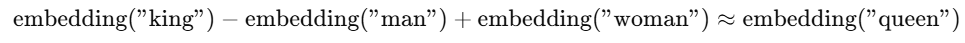

We can use this to find similar words

In [ ]:
cbow_model.wv.most_similar('pitch')

[('back', 0.9990931153297424),
 ('braves', 0.9990895986557007),
 ('still', 0.9989846348762512),
 ('since', 0.9989364147186279),
 ('numbers', 0.9989176392555237),
 ('runs', 0.9989131689071655),
 ('given', 0.9988940358161926),
 ('ball', 0.9988912343978882),
 ('said', 0.9988840222358704),
 ('never', 0.9988783597946167)]

Use the additivity property: Chicago + Cubs - Boston = Sox

Teams: Chicago Cubs and Boston Red Sox

In [ ]:
cbow_model.wv.most_similar(positive=['chicago','cubs'],negative=['boston'])

[('suck', 0.9976903200149536),
 ('lost', 0.9952278733253479),
 ('expos', 0.9949150085449219),
 ('won', 0.994818389415741),
 ('giants', 0.9945830702781677),
 ('east', 0.9945015907287598),
 ('milwaukee', 0.9943141341209412),
 ('seattle', 0.9942592978477478),
 ('mariners', 0.9942581057548523),
 ('cincinnati', 0.9942570924758911)]

Use the word embeddings to obtain a vector representation of the document by taking the average of the embeddings of the words. Transform the train and test data

Average Embending Vector = "Summary" Vector for the Document

In [ ]:
np.array([cbow_model.wv[x] for x in X_news_train_gsim[0]]).mean(axis = 0)

array([ 0.16269271, -0.32079282, -0.24949013,  0.34514046, -0.7035073 ,
       -1.1054051 ,  0.9747819 ,  1.616618  , -0.8275265 , -0.14870308,
       -0.1820013 , -1.0672215 ,  0.53618616,  0.9504583 , -0.6120165 ,
        0.4206652 ,  0.81809497,  0.03129148, -1.3500336 , -0.9550005 ,
        0.56004936,  0.39919704,  1.6791399 , -0.7291129 ,  0.58662474,
        0.49527878, -0.68148035,  0.67468274, -1.5316198 ,  0.08964702,
        0.1345206 , -0.02513752,  0.11352268, -0.2370229 , -0.6332324 ,
        0.3908564 ,  0.4332514 ,  0.10689104,  0.5662063 , -1.1465707 ,
        0.6931561 , -0.09274205, -0.06402197, -0.29591024,  1.8230256 ,
       -0.07709917, -0.23865739, -0.53896314,  0.61828065,  0.54127735],
      dtype=float32)

In [ ]:
X_news_train_cbow = [np.array([cbow_model.wv[x] for x in y]).mean(axis = 0) for y in X_news_train_gsim]

In [ ]:
X_news_test_cbow = [np.array([cbow_model.wv[x] for x in y if x in cbow_model.wv]).mean(axis = 0) for y in X_news_test_gsim]

Train a classifier on the embeddings

In [ ]:
lr_clf.fit(np.array(X_news_train_cbow), np.array(y_news_train_gsim))

LogisticRegression()

In [ ]:
lr_clf.score(np.array(X_news_test_cbow),y_news_test_gsim)

0.7849604221635884

Train a SkipGram embedding on the training data corpus

In [ ]:
embedding_size = 50
skipgram_model = gensim.models.Word2Vec(X_news_train_gsim, min_count = 1,vector_size = embedding_size, window = 10, sg = 1)

Transform the train and test data

In [ ]:
X_news_train_skipgram = [np.array([skipgram_model.wv[x] for x in y]).mean(axis = 0) for y in X_news_train_gsim]

X_news_test_skipgram = [np.array([skipgram_model.wv[x] for x in y if x in skipgram_model.wv]).mean(axis = 0) for y in X_news_test_gsim]

Train a classifier on the emebddings

In [ ]:
lr_clf.fit(np.array(X_news_train_skipgram), np.array(y_news_train_gsim))

lr_clf.score(np.array(X_news_test_skipgram),y_news_test_gsim)

0.9234828496042217

You can also download the Google word2vec model trained over millions of documents (use pre-trained models)

In [ ]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
#path = 'C:\\Users\\tsapa/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz'
g_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
print(len(g_model['hello']))
print(g_model['hello'])

300
[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.10839844 -

The commands below are too slow, and run out of memory

In [ ]:
g_model.most_similar('pitch')

[('pitches', 0.7401652932167053),
 ('backdoor_slider', 0.5972762107849121),
 ('fastball', 0.5737808346748352),
 ('curveball', 0.5543882846832275),
 ('hanging_slider', 0.5523896217346191),
 ('hittable_pitch', 0.5503243207931519),
 ('leadoff_batter_Cliff_Floyd', 0.5496907830238342),
 ('offspeed_pitch', 0.547758936882019),
 ('atbat', 0.5441111326217651),
 ('yaw_converters_SCADA', 0.5410848259925842)]

In [ ]:
g_model.most_similar(positive=['chicago','rangers'],negative=['texas'])

[('park_rangers', 0.5574042201042175),
 ('ranger', 0.5385411381721497),
 ('forest_rangers', 0.5039790868759155),
 ('Bwindi_Impenetrable_National', 0.47236543893814087),
 ('interpretive_rangers', 0.46525704860687256),
 ('park_ranger', 0.4612078368663788),
 ('TMNP', 0.4502459764480591),
 ('domesticated_bunnies', 0.44161665439605713),
 ('Kidepo', 0.4396536648273468),
 ('cubs', 0.4380701184272766)]

In [ ]:
g_model.most_similar(positive=['woman','king'],negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

Transform the train and test data

In [ ]:
train_gmodel = [[g_model[x] for x in y if x in g_model] for y in X_news_train_gsim]
train_data_labels = [(x,y) for (x,y) in zip(train_gmodel, y_news_train) if len(x) > 0]
X_news_train_gm = [np.array(x) for (x,y) in train_data_labels]
y_news_train_gm = [y for (x,y) in train_data_labels]

In [ ]:
X_news_train_gmodel = [x.mean(axis = 0) for x in X_news_train_gm]

In [ ]:
test_gmodel = [[g_model[x] for x in y if x in g_model] for y in X_news_test_gsim]
test_data_labels = [(x,y) for (x,y) in zip(test_gmodel, y_news_test) if len(x) > 0]
X_news_test_gm = [np.array(x) for (x,y) in test_data_labels]
y_news_test_gm = [y for (x,y) in test_data_labels]

In [ ]:
X_news_test_gmodel = [x.mean(axis = 0) for x in X_news_test_gm]

Train a classifier on the emebddings

In [ ]:
lr_clf.fit(X_news_train_gmodel, np.array(y_news_train_gm))

LogisticRegression()

In [ ]:
lr_clf.score(np.array(X_news_test_gmodel),y_news_test_gm)

0.4947229551451187

Why did the much more generaly word2vec model from google perform much worse than our simple CBOW and Skip-Gram models?

### The Glove Embedding

This is another embedding produced by Google, available online. It is faster to use and performs better in terms of similarity and analogies, but not for classification.

In [ ]:
print(api.load('glove-wiki-gigaword-50', return_path=True))

[==================================================] 100.0% 66.0/66.0MB downloaded
/root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz


In [ ]:
glove_model = api.load("glove-wiki-gigaword-50")

In [ ]:
glove_model.most_similar('pitch')

[('pitches', 0.8380102515220642),
 ('pitching', 0.775322675704956),
 ('ball', 0.7705615162849426),
 ('infield', 0.769540548324585),
 ('inning', 0.7672455906867981),
 ('game', 0.751035213470459),
 ('hitters', 0.7493574619293213),
 ('outfield', 0.7477315068244934),
 ('hitter', 0.7467021346092224),
 ('pitched', 0.7417561411857605)]

In [ ]:
glove_model.most_similar(positive=['chicago','rangers'],negative=['texas'])

[('blackhawks', 0.798629641532898),
 ('sabres', 0.7900724411010742),
 ('canucks', 0.7876151204109192),
 ('canadiens', 0.7621992826461792),
 ('leafs', 0.7570874094963074),
 ('bruins', 0.7503584027290344),
 ('oilers', 0.7478305101394653),
 ('dodgers', 0.7437342405319214),
 ('phillies', 0.7399099469184875),
 ('mets', 0.7378402352333069)]

In [ ]:
glove_model.most_similar(positive=['woman','king'],negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [ ]:
train_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_news_train_gsim]
train_data_labels = [(x,y) for (x,y) in zip(train_glove, y_news_train) if len(x) > 0]
X_news_train_glove = [np.array(x).mean(axis=0) for (x,y) in train_data_labels]
y_news_train_glove = [y for (x,y) in train_data_labels]

In [ ]:
test_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_news_test_gsim]
test_data_labels = [(x,y) for (x,y) in zip(test_glove, y_news_test) if len(x) > 0]
X_news_test_glove = [np.array(x).mean(axis=0) for (x,y) in test_data_labels]
y_news_test_glove = [y for (x,y) in test_data_labels]

In [ ]:
lr_clf.fit(X_news_train_glove, np.array(y_news_train_glove))

LogisticRegression()

In [ ]:
lr_clf.score(np.array(X_news_test_glove),y_news_test_glove)

0.5118733509234829

### The Doc2Vec model

Similar to Word2Vec the Doc2Vec produces embeddings for full documents. It performs much better for classification, indicating that simple averaging of the word embeddings is not a good option.

In [ ]:
train_corpus = [gensim.models.doc2vec.TaggedDocument(X_news_train_gsim[i], [i]) for i in range(len(X_news_train_gsim))]

In [ ]:
d2v_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
d2v_model.build_vocab(train_corpus)
d2v_model.train(train_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

In [ ]:
X_news_train_d2v = [d2v_model.infer_vector(x) for x in X_news_train_gsim]
X_news_test_d2v = [d2v_model.infer_vector(x) for x in X_news_test_gsim]

In [ ]:
lr_clf.fit(X_news_train_d2v, np.array(y_news_train_gsim))
lr_clf.score(X_news_test_d2v,y_news_test_gsim)

0.9379947229551451